In [1]:
# Directory where we can find data for plotting
data_dir = 'data/'

In [2]:
import numpy as np
import pandas as pd
import sys
#import time
import matplotlib.pyplot as plt
#import emcee  # MCMC package
#import corner  # For plots later - not essential to run but great for viewing
import astropy.coordinates as coord  # For getting dust values
import astropy.units as u  # # For getting dust values
#from psutil import virtual_memory  # For preventing RAM errors in emcee running
#from mpl_toolkits.mplot3d import Axes3D  # 3D plots
#from astropy.stats import knuth_bin_width  # Great bin width estimator
#from scipy.optimize import minimize  # Used in a few places for minimisation
#from scipy.stats import norm  # Fast normal distribution evaluator
#from scipy.stats import iqr as interquartile_range
#from scipy.signal import savgol_filter  # Smoothing algorithm
#from scipy.interpolate import interp1d as interpolate  # Cubic splines
from astroquery.irsa_dust import IrsaDust  # For getting dust values

In [6]:
data_all = pd.read_csv(data_dir + 'badass_table_of_awesomeness.csv')

# Force Jupyter to display the whole table for us to gawk at
with pd.option_context('display.max_rows', None, 'display.max_columns', 200):
    display(data_all)

,solution_id_1,designation,source_id_1,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,recno,Name,VType,logPer,<Jmag>,<Hmag>,<Kmag>,[Fe/H]l,[Fe/H],e_[Fe/H],Nsp,Mod,e_Mod,Rgal,e_Rgal,Notes,Ref,_RA,_DE,Separation,main_id,ra_x,dec_x,coo_err_maj,coo_err_min,coo_err_angle,nbref,ra_sexa,dec_sexa,main_type,other_types,radvel,redshift,sp_type,morph_type,plx,pmra_x,pmdec_x,size_maj,size_min,size_angle,B_x,V,R_x,J,H,K,u,g,r_xa,i,z,angDist,solution_id_2,source_id_2,pf,pf_error,p1_o,p1_o_error,p2_o,p2_o_error,p3_o,p3_o_error,epoch_g,epoch_g_error,epoch_bp,epoch_bp_error,epoch_rp,epoch_rp_error,int_average_g,int_average_g_error,int_average_bp,int_average_bp_error,int_average_rp,int_average_rp_error,peak_to_peak_g,peak_to_peak_g_error,peak_to_peak_bp,peak_to_peak_bp_error,peak_to_peak_rp,peak_to_peak_rp_error,metallicity,metallicity_error,r21_g,r21_g_error,r31_g,r31_g_error,phi21_g,phi21_g_error,phi31_g,phi31_g_error,num_clean_epochs_g,num_clean_epochs_bp,num_clean_epochs_rp,g_absorption,g_absorption_error,type_best_classification,type2_best_sub_classification,mode_best_classification,multi_mode_best_classification
0,1635721458409799680,Gaia DR2 3031875585286182144,3031875585286182144,13684566,2015.5,110.509905,0.033571,-14.318180,0.032630,0.275704,0.048918,5.636033,-2.179608,0.065318,3.144803,0.062298,-0.126156,0.187025,0.090076,0.218720,-0.147387,0.286678,0.234164,0.224604,-0.336551,-0.097901,203,203,201,2,4.977538,311.08228,0.000000,0.000000e+00,31,False,278.996030,1.518955,0.009147,-0.056529,23,13,0.041935,0,25,False,221,3.642909e+06,3.656886e+04,99.617780,9.284745,25,1.496887e+06,6.228066e+04,24.034540,9.913416,25,2.902172e+06,7.014619e+04,41.373196,8.605112,1.207568,0,1.308304,0.628671,0.679633,58.927140,10.408811,4,4750.0,4.5,0.00,VARIABLE,229.127634,0.116586,114.813568,-36.007348,100001.0,4577.5000,4556.6665,4659.6050,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,77.219000,74.521690,77.926730,2358.612000,1779.78320,2937.441000,http://geadata.esac.esa.int/data-server/datali...,http://geadata.esac.esa.int/data-server/data?R...,3,TW Cma,DCEP,0.8448,7.567,7.178,7.008,-0.51,0.04,0.09,1.0,12.02,0.05,9788,445,a,LEM,110.50992,-14.31819,0.063587,V* TW CMa,110.509915,-14.318194,0.000,0.000,90.0,83,07 22 02.37948,-14 19 05.4975,deltaCep,V* |cC*|* |IR,66.500,NaN,F5,NaN,0.2757,-2.18,3.15,NaN,NaN,NaN,10.400,9.590,NaN,7.781,7.327,7.131,NaN,NaN,NaN,NaN,NaN,0.059307,369295549951641967,3031875585286182144,6.994835,0.000034,NaN,N

In [7]:
for cols in data_all.columns:
    print(cols)

solution_id_1
designation
source_id_1
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
astrometric_weight_al
astrometric_pseudo_colour
astrometric_pseudo_colour_error
mean_varpi_factor_al
astrometric_matched_observations
visibility_periods_used
astrometric_sigma5d_max
frame_rotator_object_type
matched_observations
duplicated_source
phot_g_n_obs
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_flux_over_error
phot_g_mean_mag
phot_bp_n_obs
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_flux_over_error
phot_bp_mea

In [8]:
# Define all the columns we wish to keep
columns_to_keep = ['designation', 'ra', 'ra_error', 'dec', 'dec_error', 
                   'mode_best_classification', 'parallax', 'parallax_error', 
                   'pf', 'pf_error', 
                   'u', 'B_x', 'V', 'g', 'R_x', 'r_xa', 'i', 'z', '<Jmag>', 
                   '<Hmag>', '<Kmag>', 
                   '[Fe/H]', 'e_[Fe/H]']
data = data_all[columns_to_keep].copy()

# Rename this columns into my own formatting
data = data.rename(columns = {'designation':'ID_Gaia', 'mode_best_classification':'var_type', 
             'parallax':'omega_exp', 'parallax_error':'omega_sigma',
             'pf':'P_exp', 'pf_error':'P_sigma', 
             'u':'m_exp_U', 'B_x':'m_exp_B', 'V':'m_exp_V', 'g':'m_exp_g', 
             'R_x':'m_exp_R', 'r_xa':'m_exp_rxa', 'i':'m_exp_I', 'z':'m_exp_Z',
             '<Jmag>':'m_exp_J', '<Hmag>':'m_exp_H', '<Kmag>':'m_exp_K', 
             '[Fe/H]':'FeH_exp', 'e_[Fe/H]':'FeH_sigma'})

# A user-kept list of all band names and wavelengths [microm] in the model
all_band_names = np.array(['U', 'B', 'V', 'g', 
                           'R', 'rxa', 'I', 'Z', 
                           'J', 'H', 'K'])

all_band_wavelengths = np.array([.365, .445, .551, .464, 
                                 .658, .658, .806, .900, 
                                 1.22, 1.63, 2.19])

# Drop everything that isn't FUNdamental mode
data = data[data.var_type == 'FUNDAMENTAL']

# Drop cepheids without periods in the range 2.0 > log10(P) > 0.4
log_P = np.log10(np.asarray(data['P_exp']))
data = data[np.logical_and(log_P < 2.0, log_P > 0.4)]
data['log_P_exp'] = np.log10(data['P_exp']) - 1.0

# Count how many measurements are in each band so the user can decide where
# to go from here - which bands to use, and if any cepheids have too little
# band information to be usable.
band_count = {}
for a_band in all_band_names:
    band_count[a_band] = np.count_nonzero(np.isfinite(
                                                    data['m_exp_'+ a_band]))
    print("Band {} contains {} measurements".format(a_band, 
                                                    band_count[a_band]))

Band U contains 0 measurements
Band B contains 214 measurements
Band V contains 184 measurements
Band g contains 0 measurements
Band R contains 9 measurements
Band rxa contains 0 measurements
Band I contains 0 measurements
Band Z contains 0 measurements
Band J contains 230 measurements
Band H contains 230 measurements
Band K contains 230 measurements


In [9]:
data = data[data.var_type == 'FUNDAMENTAL']



In [10]:
for cols in data.columns:
    print(cols)

ID_Gaia
ra
ra_error
dec
dec_error
var_type
omega_exp
omega_sigma
P_exp
P_sigma
m_exp_U
m_exp_B
m_exp_V
m_exp_g
m_exp_R
m_exp_rxa
m_exp_I
m_exp_Z
m_exp_J
m_exp_H
m_exp_K
FeH_exp
FeH_sigma
log_P_exp


# Data needed for fitting:

badass_table_of_awesomeness.csv is for MW Cepheids. Want to fit PLZs for CRRP RRL.

Data needed: 

* ID_Gaia
* ra
* ra_error
* dec
* dec_error
* var_type
* omega_exp
* omega_sigma
* P_exp
* P_sigma
* m_exp_U
* m_exp_B
* m_exp_V
* m_exp_g
* m_exp_R
* m_exp_rxa
* m_exp_I
* m_exp_Z
* m_exp_J
* m_exp_H
* m_exp_K
* FeH_exp
* FeH_sigma
* log_P_exp

where \_exp\_ denotes observed values (i.e. not "true" values in Bayesian sense)

Don't necessarily need all these photometric bands - could just grab Spitzer and Gaia phot bands.


In [11]:
from astropy.table import Table

from astropy.io import ascii

In [16]:
table1 = ascii.read("/Users/vs522/Dropbox/Python/gaia_dr2/rrlyrae/Monson17_TMMT/table1.dat", readme="/Users/vs522/Dropbox/Python/gaia_dr2/rrlyrae/Monson17_TMMT/ReadMe")


In [17]:
table1

Name,FPer,HJD,zeta,RRL,BLPer,[Fe/H],r_[Fe/H],HIP,BW,HST
,d,d,d / yr,,d,[Sun],,,,
str9,float64,float64,float64,str4,float64,float64,str1,str3,str3,str3
SW And,0.4422602,2456876.9206,0.000172,RRab,36.8,-0.24,--,HIP,"1,2",--
XX And,0.722757,2456750.915,--,RRab,--,-1.94,--,HIP,--,--
WY Ant,0.5743456,2456750.384,-0.000146,RRab,--,-1.48,--,HIP,3,--
X Ari,0.65117288,2456750.387,-0.00024,RRab,--,-2.43,--,HIP,"4,5",--
ST Boo,0.622286,2456750.525,--,RRab,284.0,-1.76,--,HIP,--,--
UY Boo,0.65083,2456750.522,--,RRab,171.8,-2.56,--,HIP,--,--
RR Cet,0.553029,2456750.365,--,RRab,--,-1.45,--,HIP,1,--
W Crt,0.41201459,2456750.279,-9.4e-05,RRab,--,-0.54,--,HIP,3,--


In [18]:
table5 = ascii.read("/Users/vs522/Dropbox/Python/gaia_dr2/rrlyrae/Monson17_TMMT/table5.dat", readme="/Users/vs522/Dropbox/Python/gaia_dr2/rrlyrae/Monson17_TMMT/ReadMe")



In [19]:
table5

Name,<Umag>,e_<Umag>,<Bmag>,e_<Bmag>,<Vmag>,e_<Vmag>,<Rmag>,e_<Rmag>,<Imag>,e_<Imag>,<Jmag>,e_<Jmag>,<Hmag>,e_<Hmag>,<Ksmag>,e_<Ksmag>,<[3.6]>,e_<[3.6]>,<[4.5]>,e_<[4.5]>
,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag
str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
SW And,10.287,0.02,10.097,0.006,9.692,0.006,9.433,0.02,9.169,0.008,8.757,0.02,8.59,0.013,8.511,0.009,8.485,0.009,8.472,0.008
XX And,--,--,11.018,0.009,10.676,0.009,--,--,10.145,0.009,--,--,--,--,--,--,9.409,0.009,9.384,0.008
WY Ant,11.262,0.02,11.217,0.004,10.851,0.004,10.601,0.02,10.324,0.004,9.915,0.02,9.696,0.013,9.599,0.009,9.567,0.009,9.548,0.008
X Ari,10.25,0.01,10.061,0.006,9.562,0.006,9.231,0.02,8.868,0.007,8.306,0.02,8.057,0.013,7.926,0.009,7.885,0.009,7.859,0.009
AE Boo,--,--,10.887,0.009,10.64,0.009,--,--,10.254,0.009,--,--,--,--,--,--,9.75,0.011,9.749,0.011
ST Boo,--,--,11.265,0.012,10.94,0.012,--,--,10.484,0.012,--,--,--,--,--,--,9.834,0.009,9.816,0.009
TV Boo,11.23,0.02,11.179,0.009,10.986,0.009,10.838,0.02,10.652,0.009,10.294,0.009,--,--,10.181,0.009,10.197,0.009,10.179,0.009
UY Boo,--,--,11.28,0.009,10.927,0.009,--,--,10.428,0.009,--,--,--,--,--,--,9.721,0.008,9.696,0.009


##### 

In [20]:
t1_df = table1.to_pandas()

In [27]:
t5_df = table5.to_pandas()

In [22]:
t1_df

,Name,FPer,HJD,zeta,RRL,BLPer,[Fe/H],r_[Fe/H],HIP,BW,HST
0,SW And,0.442260,2.456877e+06,0.000172,RRab,36.80,-0.24,NaN,HIP,"1,2",NaN
1,XX And,0.722757,2.456751e+06,NaN,RRab,NaN,-1.94,NaN,HIP,NaN,NaN
2,WY Ant,0.574346,2.456750e+06,-0.000146,RRab,NaN,-1.48,NaN,HIP,3,NaN
3,X Ari,0.651173,2.456750e+06,-0.000240,RRab,NaN,-2.43,NaN,HIP,"4,5",NaN
4,ST Boo,0.622286,2.456751e+06,NaN,RRab,284.00,-1.76,NaN,HIP,NaN,NaN
5,UY Boo,0.650830,2.456751e+06,NaN,RRab,171.80,-2.56,NaN,HIP,NaN,NaN
6,RR Cet,0.553029,2.456750e+06,NaN,RRab,NaN,-1.45,NaN,HIP,1,NaN
7,W Crt,0.412015,2.456750e+06,-0.000094,RRab,NaN,-0.54,NaN,HIP,3,NaN
8,UY Cyg,0.560705,2.456751e+06,NaN,RRab,NaN,-0.80,NaN,HIP,NaN,NaN
9,XZ Cyg,0.466599,2.456751e+06,NaN,RRab,57.30,-1.44,NaN,HIP,NaN,HST


In [28]:
t5_df

,Name,<Umag>,e_<Umag>,<Bmag>,e_<Bmag>,<Vmag>,e_<Vmag>,<Rmag>,e_<Rmag>,<Imag>,...,<Jmag>,e_<Jmag>,<Hmag>,e_<Hmag>,<Ksmag>,e_<Ksmag>,<[3.6]>,e_<[3.6]>,<[4.5]>,e_<[4.5]>
0,SW And,10.287,0.020,10.097,0.006,9.692,0.006,9.433,0.02,9.169,...,8.757,0.020,8.590,0.013,8.511,0.009,8.485,0.009,8.472,0.008
1,XX And,NaN,NaN,11.018,0.009,10.676,0.009,NaN,NaN,10.145,...,NaN,NaN,NaN,NaN,NaN,NaN,9.409,0.009,9.384,0.008
2,WY Ant,11.262,0.020,11.217,0.004,10.851,0.004,10.601,0.02,10.324,...,9.915,0.020,9.696,0.013,9.599,0.009,9.567,0.009,9.548,0.008
3,X Ari,10.250,0.010,10.061,0.006,9.562,0.006,9.231,0.02,8.868,...,8.306,0.020,8.057,0.013,7.926,0.009,7.885,0.009,7.859,0.009
4,AE Boo,NaN,NaN,10.887,0.009,10.640,0.009,NaN,NaN,10.254,...,NaN,NaN,NaN,NaN,NaN,NaN,9.750,0.011,9.749,0.011
5,ST Boo,NaN,NaN,11.265,0.012,10.940,0.012,NaN,NaN,10.484,...,NaN,NaN,NaN,NaN,NaN,NaN,9.834,0.009,9.816,0.009
6,TV Boo,11.230,0.020,11.179,0.009,10.986,0.009,10.838,0.02,10.652,...,10.294,0.009,NaN,NaN,10.181,0.009,10.197,0.009,10.179,0.009
7,UY Boo,NaN,NaN,11.280,0.009,10.927,0.009,NaN,NaN,10.428,...,NaN,NaN,NaN,NaN,NaN,NaN,9.721,0.008,9.696,0.009
8,ST CVn,NaN,NaN,11.591,0.010,11.337,0.010,NaN,NaN,10.949,...,NaN,NaN,NaN,NaN,NaN,NaN,10.437,0.009,10.413,0.009
9,UY Cam,NaN,NaN,11.685,0.009,11.507,0.009,NaN,NaN,11.207,...,NaN,NaN,NaN,NaN,NaN,NaN,10.778,0.009,10.763,0.009


In [24]:
t1_df['Name_lower'] = t1_df['Name'].str.replace(' ', '')
t1_df['Name_lower'] = t1_df.apply(lambda x: str.lower(x.Name_lower), axis=1)

In [29]:
t5_df['Name_lower'] = t5_df['Name'].str.replace(' ', '')
t5_df['Name_lower'] = t5_df.apply(lambda x: str.lower(x.Name_lower), axis=1)

In [34]:
monson_df = t1_df.merge(t5_df,on='Name_lower')

In [37]:
monson_df.to_csv('/Users/vs522/Dropbox/Python/gaia_dr2/rrlyrae/Monson17_TMMT/m17_t1_t5_combined.csv', header=True, index=False)

In [38]:
big_data = pd.read_csv('/Users/vs522/Dropbox/Python/gaia_dr2/rrlyrae/monson_17_to_dr2_match.csv')

In [39]:
big_data

,Name,P_M17,RRT_type_monson,[Fe/H],r_[Fe/H],Name_lower,<Umag>,e_<Umag>,<Bmag>,e_<Bmag>,...,phi21_g_error,phi31_g,phi31_g_error,num_clean_epochs_g,num_clean_epochs_bp,num_clean_epochs_rp,g_absorption,g_absorption_error,best_classification_gaia,Separation
0,AB UMa,0.599581,RRab,-0.49,NaN,abuma,NaN,NaN,11.359,0.009,...,0.005203,NaN,NaN,70,62,56,0.023678,0.051154,RRab,0.362616
1,AE Boo,0.314890,RRc,-1.39,NaN,aeboo,NaN,NaN,10.887,0.009,...,0.007450,NaN,NaN,16,16,15,NaN,NaN,RRd,0.694006
2,AM Tuc,0.405802,RRc,-1.49,NaN,amtuc,NaN,NaN,11.918,0.006,...,NaN,NaN,NaN,25,25,25,NaN,NaN,RRc,0.580903
3,AN Ser,0.522071,RRab,-0.07,NaN,anser,NaN,NaN,11.321,0.008,...,0.001727,2.631567,0.003437,37,33,35,0.029285,0.051647,RRab,0.131578
4,AV Peg,0.390375,RRab,-0.08,NaN,avpeg,11.091,0.020,10.862,0.008,...,0.006578,NaN,NaN,17,16,18,0.277323,0.051927,RRab,0.273742
5,BB Pup,0.480549,RRab,-0.60,c,bbpup,12.764,0.020,12.586,0.007,...,0.001878,2.362422,0.003213,23,22,23,0.168088,0.051713,RRab,0.259741
6,BX Leo,0.362755,RRc,-1.28,NaN,bxleo,NaN,NaN,11.831,0.006,...,0.016305,NaN,NaN,21,23,23,NaN,NaN,RRd,0.488170
7,CU Com,0.405761,RRd,-2.38,d,cucom,NaN,NaN,13.654,0.009,...,NaN,NaN,NaN,30,27,25,NaN,NaN,RRd,0.181375
8,DX Del,0.472617,RRab,-0.39,NaN,dxdel,NaN,NaN,10.359,0.007,...,0.001908,2.478891,0.003079,48,39,39,0.195624,0.051648,RRab,0.225509
9,HK Pup,0.734207,RRab,-1.11,NaN,hkpup,NaN,NaN,11.761,0.005,...,0.003842,2.935193,0.004913,26,22,23,0.090033,0.051068,RRab,0.306825


In [40]:
data_all = pd.read_csv(data_dir + 'monson_17_to_dr2_match.csv')

# Force Jupyter to display the whole table for us to gawk at
with pd.option_context('display.max_rows', None, 'display.max_columns', 200):
    display(data_all)

,Name,P_M17,RRT_type_monson,[Fe/H],r_[Fe/H],Name_lower,<Umag>,e_<Umag>,<Bmag>,e_<Bmag>,<Vmag>,e_<Vmag>,<Rmag>,e_<Rmag>,<Imag>,e_<Imag>,<Jmag>,e_<Jmag>,<Hmag>,e_<Hmag>,<Ksmag>,e_<Ksmag>,<[3.6]>,e_<[3.6]>,<[4.5]>,e_<[4.5]>,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,pf,pf_error,p1_o,p1_o_error,p2_o,p2_o_error,p3_o,p3_o_error,epoch_g,epoch_g_error,epoch_bp,epoch_bp_error,epoch_rp,epoch_rp_error,int_average_g,int_average_g_error,int_average_bp,int_average_bp_error,int_average_rp,int_average_rp_error,peak_to_peak_g,peak_to_peak_g_error,peak_to_peak_bp,peak_to_peak_bp_error,peak_to_peak_rp,peak_to_peak_rp_error,metallicity_gaia,metallicity_error_gaia,r21_g,r21_g_error,r31_g,r31_g_error,phi21_g,phi21_g_error,phi31_g,phi31_g_error,num_clean_epochs_g,num_clean_epochs_bp,num_clean_epochs_rp,g_absorption,g_absorption_error,best_classification_gaia,Separation
0,AB UMa,0.599581,RRab,-0.49,NaN,abuma,NaN,NaN,11.359,0.009,10.912,0.009,NaN,NaN,10.342,0.009,NaN,NaN,NaN,NaN,NaN,NaN,9.596,0.009,9.586,0.008,1635721458409799680,Gaia DR2 1546016672688675200,1546016672688675200,347009797,2015.5,182.810682,0.018033,47.828760,0.020466,0.981761,0.030051,32.669678,-16.599464,0.027670,-16.605064,0.038753,0.322289,-0.343758,0.085140,-0.040001,-0.168094,-0.061825,-0.307947,-0.086166,-0.092522,0.295211,586,586,547,39,18.503180,1406.69230,0.000000,0.000000,31,True,378.450000,1.644034,0.005083,0.037652,68,19,0.028851,0,85,True,630,9.166002e+05,4148.851685,220.928630,10.782916,62,5.206758e+05,8053.527659,64.651886,11.059970,66,5.562051e+05,5367.953428,103.615860,10.398832,1.174864,0,0.661138,0.277054,0.384084,-42.619822,3.783781,15,5750.0,4.5,0.0,VARIABLE,141.042107,67.861414,158.465089,43.874354,100001,6269.0000,6162.4500,6358.1665,1.6460,1.3884,1.8290,0.8267,0.7014,0.9410,200111.0,5.148071,5.004692,5.327632,36.878810,35.062750,38.694870,0.599574,2.863890e-07,NaN,NaN,NaN,NaN,NaN,NaN,1712.699979,4.050152e-07,1712.680500,4.050152e-07,1712.693175,4.050152e-07,10.787575,0.000084,11.052950,0.000074,10.395166,0.000109,0.332588,0.000477,0.422801,0.000503,0.251736,0.000924,NaN,NaN,0.322380,0.001149,NaN,NaN,4.483476,0.005203,NaN,NaN,70,62,56,0.023678,0.051154,RRab,0.362616
1,AE Boo,0.314890,RRc,-1.39,NaN,aeboo,NaN,NaN,10.887,0.009,10.640,0.009,NaN,NaN,10.254,0.009,NaN,NaN,NaN,NaN,NaN,NaN,9.750,0.011,9.749,0.011,1635721458409799680,Gaia DR2 1234729400256865664,1234729400256865664,356194283,2015.5,221.896831,0.035068,16.845268,0.032

In [67]:
for cols in data_all.columns:
    print("\'" + cols +"\',")

'Name',
'P_M17',
'RRT_type_monson',
'[Fe/H]',
'r_[Fe/H]',
'Name_lower',
'<Umag>',
'e_<Umag>',
'<Bmag>',
'e_<Bmag>',
'<Vmag>',
'e_<Vmag>',
'<Rmag>',
'e_<Rmag>',
'<Imag>',
'e_<Imag>',
'<Jmag>',
'e_<Jmag>',
'<Hmag>',
'e_<Hmag>',
'<Ksmag>',
'e_<Ksmag>',
'<[3.6]>',
'e_<[3.6]>',
'<[4.5]>',
'e_<[4.5]>',
'solution_id',
'designation',
'source_id',
'random_index',
'ref_epoch',
'ra',
'ra_error',
'dec',
'dec_error',
'parallax',
'parallax_error',
'parallax_over_error',
'pmra',
'pmra_error',
'pmdec',
'pmdec_error',
'ra_dec_corr',
'ra_parallax_corr',
'ra_pmra_corr',
'ra_pmdec_corr',
'dec_parallax_corr',
'dec_pmra_corr',
'dec_pmdec_corr',
'parallax_pmra_corr',
'parallax_pmdec_corr',
'pmra_pmdec_corr',
'astrometric_n_obs_al',
'astrometric_n_obs_ac',
'astrometric_n_good_obs_al',
'astrometric_n_bad_obs_al',
'astrometric_gof_al',
'astrometric_chi2_al',
'astrometric_excess_noise',
'astrometric_excess_noise_sig',
'astrometric_params_solved',
'astrometric_primary_flag',
'astrometric_weight_al',
'astrometric_

In [46]:
data_all['[Fe/H]'].count()

32

In [70]:
# Define all the columns we wish to keep
columns_to_keep = ['Name','source_id', 'ra', 'ra_error', 'dec', 'dec_error', 
                   'best_classification_gaia', 'parallax', 'parallax_error', 
                   'pf', 'pf_error', 'p1_o', 'p1_o_error', 
                   '<Umag>', 'e_<Umag>', '<Bmag>', 'e_<Bmag>', '<Vmag>', 'e_<Vmag>',
                   '<Rmag>', 'e_<Rmag>', '<Imag>', 'e_<Imag>', '<Jmag>', 'e_<Jmag>',
                   '<Hmag>','e_<Hmag>', '<Ksmag>', 'e_<Ksmag>', '<[3.6]>', 'e_<[3.6]>', 
                   '<[4.5]>', 'e_<[4.5]>', '[Fe/H]', 'metallicity_gaia', 'metallicity_error_gaia']
data = data_all[columns_to_keep].copy()

# Rename this columns into my own formatting
data = data.rename(columns = {'best_classification_gaia':'var_type', 
             'parallax':'omega_exp', 'parallax_error':'omega_sigma',
             'pf':'P_exp', 'pf_error':'P_sigma', 
             '<Umag>':'m_exp_U', '<Bmag>':'m_exp_B', '<Vmag>':'m_exp_V', '<Rmag>':'m_exp_R', '<Imag>':'m_exp_I', '<Jmag>':'m_exp_J', '<Hmag>':'m_exp_H','<Ksmag>':'m_exp_Ks', '<[3.6]>':'m_exp_S1', '<[4.5]>':'m_exp_S2',
             'e_<Umag>':'e_exp_U', 'e_<Bmag>':'e_exp_B', 'e_<Vmag>':'e_exp_V', 'e_<Rmag>':'e_exp_R', 'e_<Imag>':'e_exp_I', 'e_<Jmag>':'e_exp_J', 'e_<Hmag>':'e_exp_H','e_<Ksmag>':'e_exp_Ks', 'e_<[3.6]>':'e_exp_S1', 'e_<[4.5]>':'e_exp_S2',
             '[Fe/H]':'FeH_monson', 'metallicity_gaia':'metal_gaia', 'metallicity_error_gaia': 'e_metal_gaia',})

# A user-kept list of all band names and wavelengths [microm] in the model
all_band_names = np.array(['U', 'B', 'V', 'R', 
                           'I', 'J', 'H', 'Ks', 
                           'S1', 'S2'])

all_band_wavelengths = np.array([.365, 0.445, 0.551, 0.658, 0.806, 1.22, 1.63, 2.19, 3.545, 4.442])

# Drop the RRd's
data = data[data.var_type != 'RRd']

# Removing the period cut

# Count how many measurements are in each band so the user can decide where
# to go from here - which bands to use, and if any cepheids have too little
# band information to be usable.
band_count = {}
for a_band in all_band_names:
    band_count[a_band] = np.count_nonzero(np.isfinite(
                                                    data['m_exp_'+ a_band]))
    print("Band {} contains {} measurements".format(a_band, 
                                                    band_count[a_band]))

Band U contains 12 measurements
Band B contains 29 measurements
Band V contains 29 measurements
Band R contains 12 measurements
Band I contains 29 measurements
Band J contains 9 measurements
Band H contains 4 measurements
Band Ks contains 10 measurements
Band S1 contains 29 measurements
Band S2 contains 29 measurements


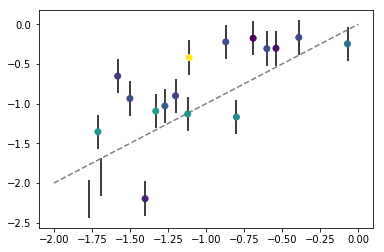

In [62]:
plt.errorbar(data_all['[Fe/H]'], data_all.metallicity_gaia, yerr=data_all.metallicity_error_gaia, color='k', ls='None')
plt.scatter(data_all['[Fe/H]'], data_all.metallicity_gaia, c=data_all.pf, zorder=4)
x = np.arange(-2, 1.0)
plt.plot(x, x, ls='--', color='grey')

In [68]:
data_all.best_classification_gaia

0     RRab
1      RRd
2      RRc
3     RRab
4     RRab
5     RRab
6      RRd
7      RRd
8     RRab
9     RRab
10    RRab
11    RRab
12     RRc
13    RRab
14    RRab
15    RRab
16    RRab
17     RRc
18    RRab
19     RRc
20    RRab
21     RRc
22     RRc
23    RRab
24    RRab
25     RRc
26    RRab
27    RRab
28    RRab
29    RRab
30    RRab
31     RRc
Name: best_classification_gaia, dtype: object